## Publication Volume

#### Importing notebooks

In [1]:
%%capture
%run '01. Data Retrieval.ipynb'

#### Importing packages

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re

#### Constants

In [3]:
publication_volume_title = 'publication volume'
no_results = 'Ihre Suchanfrage ergab 0 Treffer'

starting_date = datetime.date(2011, 5, 1)
ending_date = datetime.date(2017, 11, 18)

In [4]:
amount_publications = []

delta = ending_date - starting_date
dates = pandas.date_range(starting_date, starting_date + datetime.timedelta(delta.days), freq='D')

browser = webdriver.Firefox()

### 1. Getting Publication Volume Data

In [ ]:
for current_date in dates:

    current_date_day = current_date.strftime('%d')
    current_date_month = current_date.strftime('%m')
    current_date_year = current_date.strftime('%Y')
    
    base_url = 'https://www.genios.de/dosearch?explicitSearch=true&q=bitcoin&searchRestriction=&dbShortcut=%3A2%3AALLEQUELLENNEU-1_%3A2%3AALLEQUELLENNEU&searchMask=5461&TI%2CUT%2CDZ%2CBT%2COT%2CSE%2CSL=&NN%2CAU%2CMM%2CZ2=&CO%2CC2%2CTA%2CKA%2CVA%2CZ1=&CT%2CZ4%2CKW=&BR%2CGW%2CN1%2CN2%2CNC%2CND%2CSC%2CWZ%2CZ5%2CAI%2CBC%2CKN%2CTN%2CVN%2CK0%2CB4=&Z3%2CCN%2CCE%2CKC%2CTC%2CVC=&timeFilterType=on&DT_from='+current_date_day+'.'+current_date_month+'.'+current_date_year+'&DT_to='+current_date_day+'.'+current_date_month+'.'+current_date_year+'&x=70&y=13'
    
    #scrape website
    browser.get(base_url)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    items_current = soup.find('div', {'class': 'moduleResultTextHeader'}).getText()
    
    #get amount of publications on that day
    if items_current == no_results:
        value = 0
    else:
        value = re.search('\(([^\)]+)\)', items_current).group(1)
        value = int(value)

    amount_publications.append(value)

In [100]:
#create new dataframe for publications
publications = pandas.DataFrame({'date': dates, 'publications_volume': amount_publications})
publications = publications.set_index('date')

### 2. Merging data

In [127]:
#merge data
alternative_data = pandas.concat([bpi, google, publications], axis=1)

#output data
alternative_data.head()

,bitcoin_price,search_volume,publications_volume
date,,,
2011-05-01,3.0331,0.704634,0
2011-05-02,3.2000,0.493244,0
2011-05-03,3.4100,0.493244,0
2011-05-04,3.4061,0.422781,0
2011-05-05,3.3330,0.493244,0


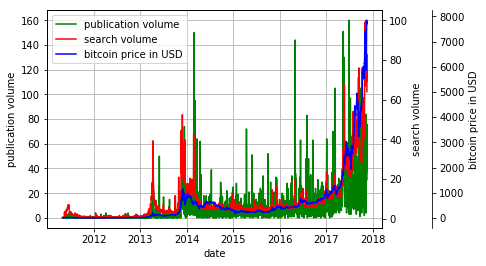

In [128]:
#plot data
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(alternative_data.index, alternative_data.publications_volume, label = publication_volume_title, color ='g')
ax2 = ax.twinx()
lns2 = ax2.plot(alternative_data.index, alternative_data.search_volume, label = search_volume_title, color = 'r')
ax3 = ax.twinx()
lns3 = ax3.plot(alternative_data.index, alternative_data.bitcoin_price, label = bitcoin_title, color = 'b')

rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel(publication_volume_title)
ax2.set_ylabel(search_volume_title)
ax3.set_ylabel(bitcoin_title)